# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
mice_count = mouse_metadata["Mouse ID"].count()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = study_results.loc[study_results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanmouse_df = merge_df.loc[merge_df["Mouse ID"] != 'g989']

cleanmouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [5]:
# Checking the number of mice in the clean DataFrame.
cleanmice_count = len(cleanmouse_df["Mouse ID"].unique())
cleanmice_count

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

meantumor = cleanmouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
mediantumor = cleanmouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance = cleanmouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
stddev = cleanmouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
stderror = cleanmouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.

drugsummary_df = pd.DataFrame(
    {
        "Mean Tumor Volume":meantumor,
        "Median Tumor Volume":mediantumor,
        "Tumor Volume Variance":variance,
        "Tumor Volume Std. Dev.":stddev,
        "Tumor Volume Std. Error":stderror
    
        
    })

drugsummary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

aggmean = 

aggmedian =

aggvar = 

aggstd =

aggsem = 


SyntaxError: invalid syntax (1631181533.py, line 6)

## Bar and Pie Charts

<Axes: >

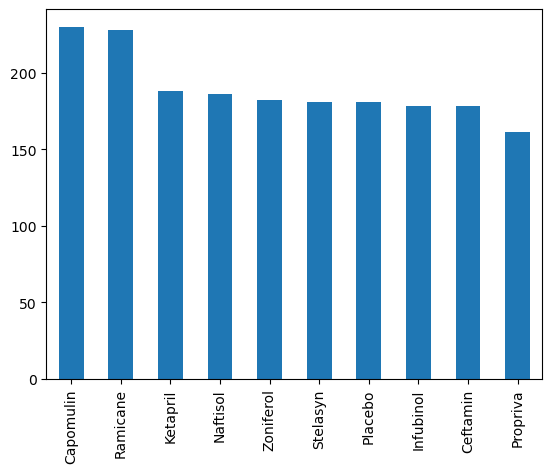

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mousecounts = merge_df["Drug Regimen"].value_counts()

pdbar = mousecounts.plot(kind='bar')

pdbar

<BarContainer object of 10 artists>

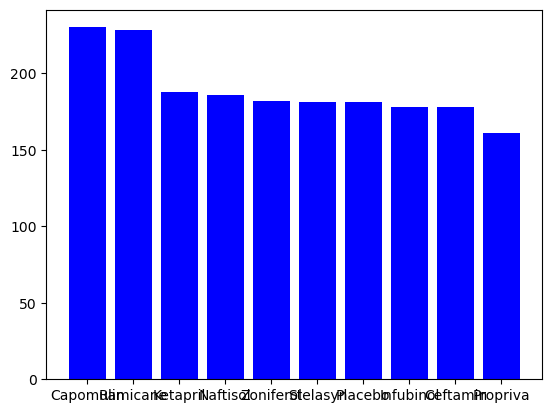

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

mousecounts = merge_df["Drug Regimen"].value_counts()

x_axis = mousecounts.index
timepoints = mousecounts.values

plt.bar(x_axis, timepoints, color="b")

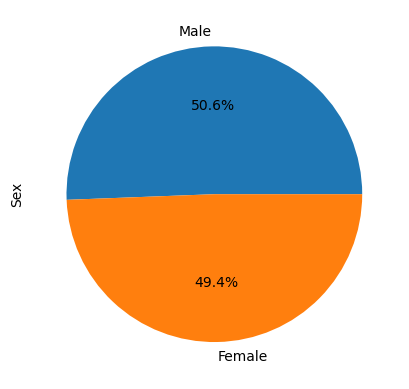

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gendercounts = merge_df["Sex"].value_counts()

genderpie_pd = gendercounts.plot(kind='pie', autopct="%.1f%%")


([<matplotlib.patches.Wedge at 0x12c7a5350>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

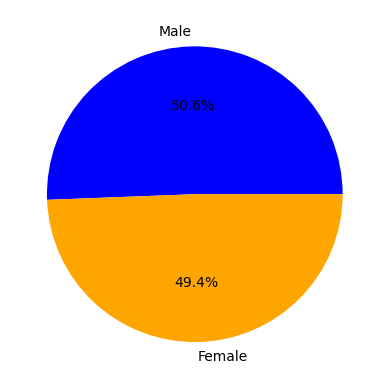

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
colors = ["blue", "orange"]

plt.pie(gendercounts, labels=labels, colors=colors,
        autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lasttimepoint = cleanmouse_df.groupby(["Mouse ID"])["Timepoint"].max()
lasttimepoint


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

finalvolume_mergedf = pd.merge(lasttimepoint, merge_df, on=['Mouse ID','Timepoint'])
finalvolume_mergedf


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [20]:
# Put treatments into a list for for loop (and later for plot labels)

treatment = ["Capomulin", "Infubinol","Ramicane", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

tumorvoldata = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatment:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    data = finalvolume_mergedf.loc[finalvolume_mergedf['Drug Regimen']==drug, 'Tumor Volume (mm3)']
    
    tumorvoldata.append(data)
    
    # Determine quartiles
    quartiles = data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Calculate upper and lower bounds to identify potential outliers
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr

    # Identify potential outliers
    outliers = data.loc[(data < lower_bound) | (data > upper_bound)]
    
    print(f"Potential outliers for {drug}: {outliers}")



Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


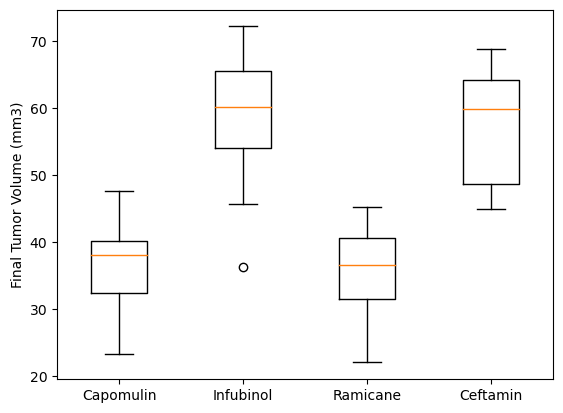

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumorvoldata, labels=treatment)
plt.show()


## Line and Scatter Plots

In [41]:
import numpy as np

In [47]:
#Finding mice treated with Capomulin for search 

capomulin_df = pd.DataFrame(finalvolume_mergedf.loc[((finalvolume_mergedf['Drug Regimen']=="Capomulin")),:])
capomulin_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
80,i557,45,Capomulin,Female,1,24,47.685963,1
83,i738,45,Capomulin,Female,23,20,37.311846,2
85,j119,45,Capomulin,Female,7,23,38.125164,1
87,j246,35,Capomulin,Female,21,21,38.753265,1
108,l509,45,Capomulin,Male,17,21,41.483008,3


ValueError: x and y must have same first dimension, but have shapes (5,) and (0,)

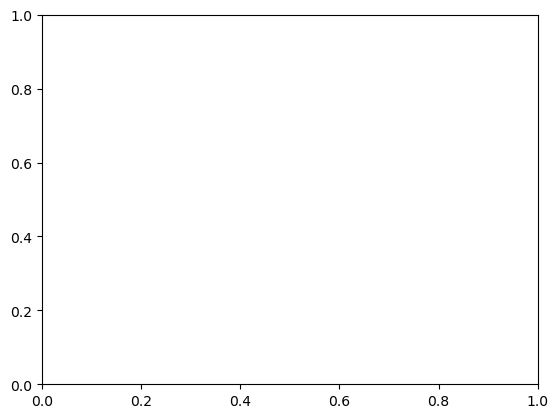

In [49]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

tumorvol = capomulin_df.loc[capomulin_df['Mouse ID']=="I509", 'Tumor Volume (mm3)']
tumorvol

timepoint = [0, 10, 20, 30, 40, 50]

g316plot = plt.plot(time, tumorvol, color="blue")

ValueError: s must be a scalar, or float array-like with the same size as x and y

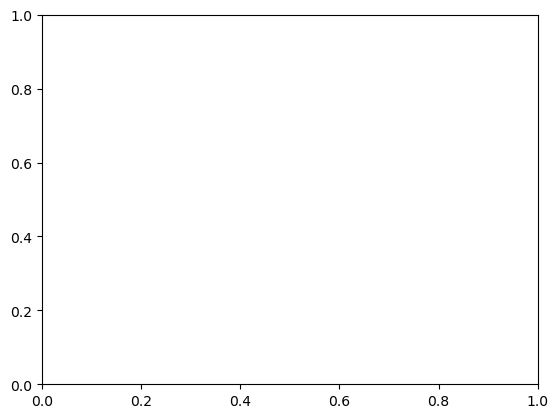

In [46]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
san_diego_housing = pd.DataFrame(housing_data_reduced.loc[((housing_data_reduced['Latitude']>32.664282) & 
                                                          (housing_data_reduced['Latitude']<32.980514) &
                                                          (housing_data_reduced['Longitude']>-117.300418) &
                                                          (housing_data_reduced['Longitude']<-117.01950)),:])

weight = finalvolume_mergedf.loc[finalvolume_mergedf['Drug Regimen']=="Capomulin", 'Weight (g)']

capo_tumrvols = finalvolume_mergedf.loc[finalvolume_mergedf['Drug Regimen']=="Capomulin", 'Tumor Volume (mm3)']

plt.scatter(weight, capo_tumrvols, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.show()

## Correlation and Regression

ValueError: x and y must be the same size

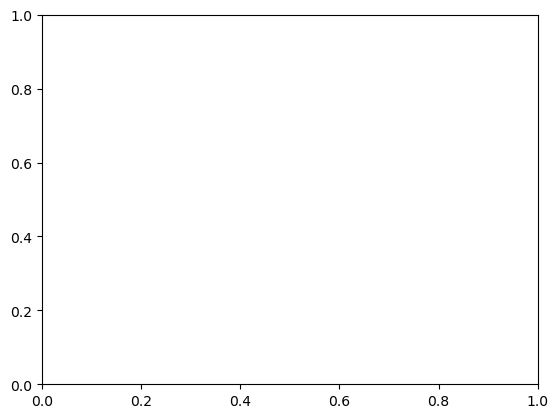

In [51]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

avgtumorvol = capomulin_df["Tumor Volume (mm3)"].mean()


x_values = capomulin_df['Weight (g)']
y_values = avgtumorvol
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()